In [14]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers as L
from tensorflow.keras import optimizers as opt
from tensorflow.keras import Sequential, Model

print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


## Регрессия!

In [15]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_train.shape

(404, 13)

In [16]:
y_train.shape

(404,)

In [97]:
model = Sequential() 
#model.add(L.InputLayer(13))
model.add(L.Dense(50, input_dim = x_train.shape[1], 
                  activation='relu', 
                  kernel_initializer='uniform'))
model.add(L.Dense(25, activation='relu',
                 kernel_initializer='uniform'))
model.add(L.Dense(10, activation='relu',
                 kernel_initializer='uniform'))
model.add(L.Dense(5, activation='relu',
                 kernel_initializer='uniform'))
model.add(L.Dense(1))

optimizer = opt.SGD(lr=1e-3)

model.compile(loss = 'mse', 
              metrics=["mae"], 
              optimizer=optimizer)

In [98]:
history = model.fit(x_train, 
          y_train,
          validation_data=(x_test, y_test),
          batch_size=64,
          epochs=10000, verbose=False)

In [99]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 50)                700       
_________________________________________________________________
dense_93 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_94 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_95 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 6         
Total params: 2,296
Trainable params: 2,296
Non-trainable params: 0
_________________________________________________________________


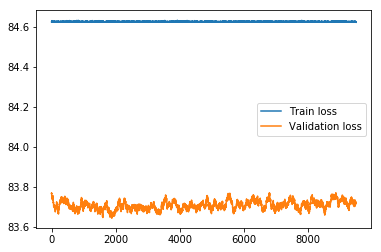

In [104]:
import matplotlib.pyplot as plt

start = 500
plt.plot(history.history['loss'][start:])
plt.plot(history.history['val_loss'][start:])
plt.legend(['Train loss', 'Validation loss']);

In [115]:
model.layers[2].weights[1]

<tf.Variable 'dense_94/bias:0' shape=(10,) dtype=float32, numpy=
array([ 5.3958977e-03,  7.0739620e-06,  2.2630105e-05,  3.1236545e-04,
        2.7044872e-03, -8.1357762e-04, -1.3874660e-03, -2.8986717e-04,
        3.3866391e-03, -7.6402607e-04], dtype=float32)>

In [112]:
x_train.shape

(404, 13)